# Data Processing and EDA
### Chistopher Evans 
### October 26, 2019

This notebook will represent the data processing and the Exploratory Data Analysis for two datasets for use in future projects. The two datasets include:
* Autism Screening data for toddlers (https://www.kaggle.com/fabdelja/autism-screening-for-toddlers/downloads/autism-screening-for-toddlers.zip/1)

The datasets are very simple in nature, but this allows us to create a basic case to allow to better communicate methodologies so that this may be a reference for the future. 

Comments will be placed within the code to explain what the code snippets are actually doing. Summaries will be presented through Markdown. This paragraph is an example of markdown.

In [56]:
# Importing two python libraries that will help manipulate data values
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, model_selection
import warnings
warnings.filterwarnings('ignore')

# Importing the actual datasets
screening = pd.read_csv("Toddler Autism dataset July 2018.csv")

## What is our data?

The Autism Screening dataset was attempting the screen for autism in toddlers using a mobile ap called ASDTests. We have a case number, ten two-choice questions, age, and a Qchat score based on the test given. These will have top priority in consideration for being used in machine learning algorithms. We also have sex, ethnicity, jaundice, family member with ASD, who completed the test, and class. Only class will be considered for the sake of simplifying the problem, since it represents each actual result for the test given. 


## How clean are our datasets?

The dataset for Autism screening is complete and clean and it will be shown below based on numerous tools.

In [57]:
# Checking for completeness and value types from both datasets
screening.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
Case_No                   1054 non-null int64
A1                        1054 non-null int64
A2                        1054 non-null int64
A3                        1054 non-null int64
A4                        1054 non-null int64
A5                        1054 non-null int64
A6                        1054 non-null int64
A7                        1054 non-null int64
A8                        1054 non-null int64
A9                        1054 non-null int64
A10                       1054 non-null int64
Age_Mons                  1054 non-null int64
Qchat-10-Score            1054 non-null int64
Sex                       1054 non-null object
Ethnicity                 1054 non-null object
Jaundice                  1054 non-null object
Family_mem_with_ASD       1054 non-null object
Who completed the test    1054 non-null object
Class/ASD Traits          1054 non-null object
dtypes: int64

In [58]:
print(screening.shape)
screening.head(5)

(1054, 19)


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who completed the test,Class/ASD Traits
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes


In [59]:
# Checking how many null values there are within the Autism screening dataset
screening.isna().sum()

Case_No                   0
A1                        0
A2                        0
A3                        0
A4                        0
A5                        0
A6                        0
A7                        0
A8                        0
A9                        0
A10                       0
Age_Mons                  0
Qchat-10-Score            0
Sex                       0
Ethnicity                 0
Jaundice                  0
Family_mem_with_ASD       0
Who completed the test    0
Class/ASD Traits          0
dtype: int64

## Further Analysis Based on Categories

Using the code below, we now know that White European, Asians, and Middle Eastern individuals are more represented within the data. There are also more females than males. Most of the individuals tested did have family members that has ASD. 


Correllation didn't tell us much. The only detail to be had from correllation analysis was that Question 3 and Question 4 applied similar assumptions, due to a relatively high corellation.

Histograms have told us that older people were talking the tests and that the Q scores tended to be higher.

In [60]:
# This will show car count based on manufacturers
print(screening.groupby('Ethnicity').size())

Ethnicity
Hispanic           40
Latino             26
Native Indian       3
Others             35
Pacifica            8
White European    334
asian             299
black              53
middle eastern    188
mixed               8
south asian        60
dtype: int64


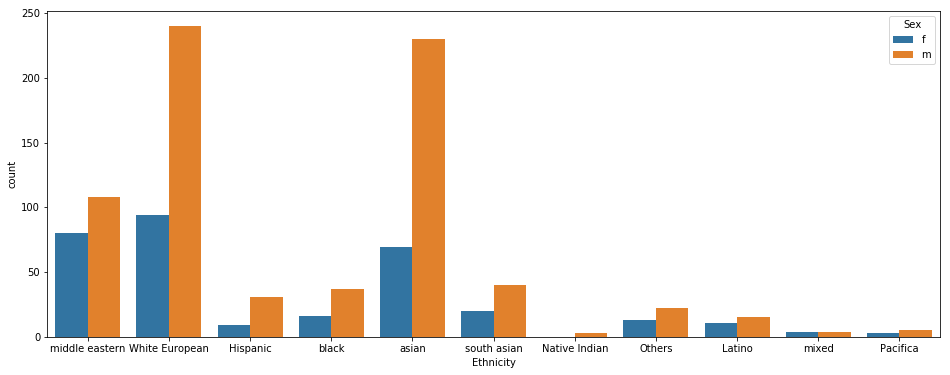

In [61]:
import seaborn as sns
plt.figure(figsize=(16,6))
sns.countplot(x= 'Ethnicity', hue = 'Sex',data= screening)

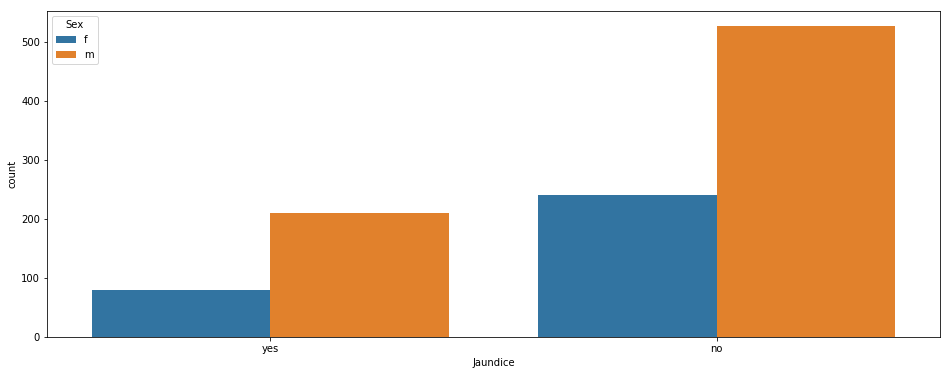

In [62]:
plt.figure(figsize=(16,6))
sns.countplot(x= 'Jaundice', hue = 'Sex',data= screening)

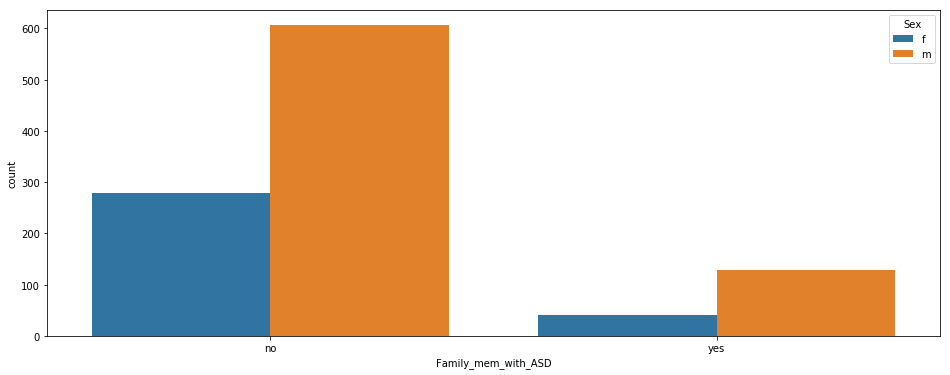

In [63]:
plt.figure(figsize=(16,6))
sns.countplot(x= 'Family_mem_with_ASD', hue = 'Sex',data= screening)

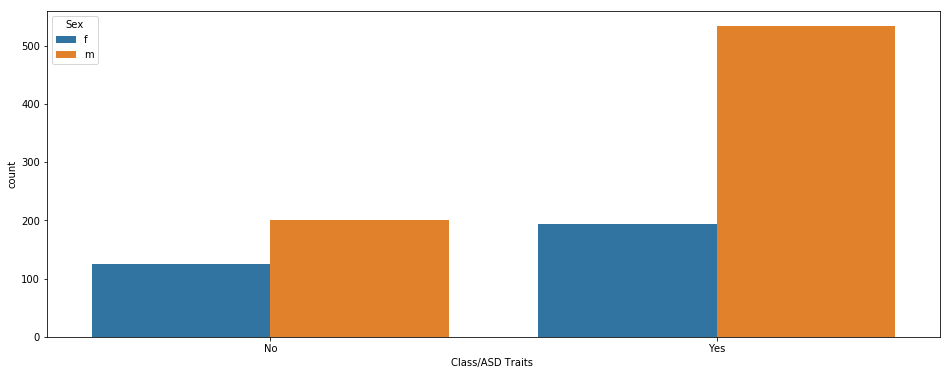

In [64]:
plt.figure(figsize=(16,6))
sns.countplot(x= 'Class/ASD Traits ', hue = 'Sex',data= screening)

<Figure size 1152x432 with 0 Axes>

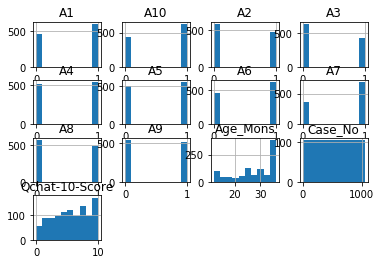

In [65]:
plt.figure(figsize=(16,6))
screening.hist()
plt.show()

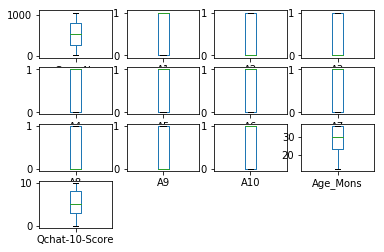

In [66]:
screening.plot(kind= 'box', subplots= True, layout= (4,4), sharex= False, sharey= False)
plt.show()

In [67]:
# This will calculate the pearson correlation coefficient
screening.corr()

,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score
Case_No,1.000000,0.050828,-0.002668,0.082087,0.073426,0.055263,0.041315,0.087687,0.023916,0.069870,-0.027257,0.027098,0.077110
A1,0.050828,1.000000,0.463227,0.244362,0.247524,0.284808,0.373083,0.332705,0.208197,0.322226,0.130966,0.040508,0.614064
A2,-0.002668,0.463227,1.000000,0.206927,0.265867,0.259105,0.309461,0.294314,0.251865,0.268784,0.157498,0.037744,0.592424
A3,0.082087,0.244362,0.206927,1.000000,0.547100,0.349086,0.297719,0.211375,0.243758,0.379129,0.003848,-0.109880,0.592885
A4,0.073426,0.247524,0.265867,0.547100,1.000000,0.348459,0.347693,0.318546,0.251504,0.427683,0.016872,-0.087873,0.642890
A5,0.055263,0.284808,0.259105,0.349086,0.348459,1.000000,0.415309,0.348913,0.316661,0.441892,0.045347,0.018448,0.649518
A6,0.041315,0.373083,0.309461,0.297719,0.347693,0.415309,1.000000,0.361758,0.280556,0.416213,0.072162,0.065907,0.659377
A7,0.087687,0.332705,0.294314,0.211375,0.318546,0.348913,0.361758,1.000000,0.257228,0.360686,0.175114,0.021442,0.619053
A8,0.023916,0.208197,0.251865,0.243758,0.251504,0.316661,0.280556,0.257228,1.000000,0.293457,0.082004,0.080505,0.543229
A9,0.069870,0.322226,0.268784,0.379129,0.427683,0.441892,0.416213,0.360686,0.293457,1.000000,0.028710,-0.048650,0.671638


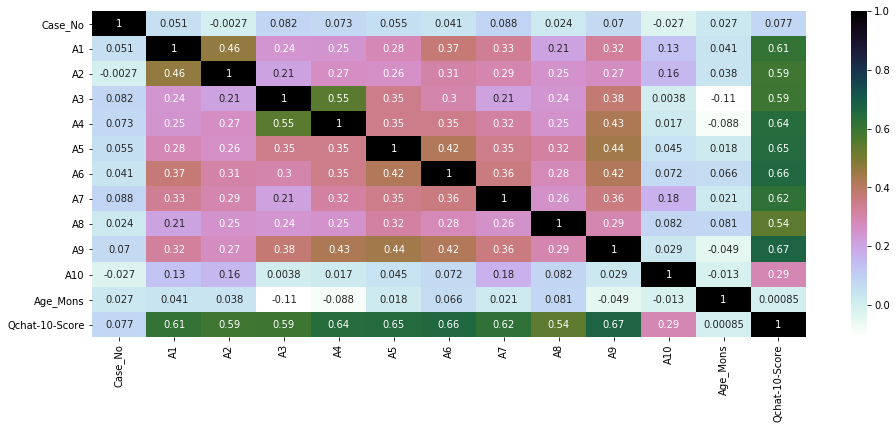

In [68]:
# This will create a heatmap based on the pearson correlation coefficient
plt.figure(figsize=(16,6))
sns.heatmap(screening.corr(),annot= True, cmap= 'cubehelix_r')
plt.show()

## Let's try some machine learning algorithms